**Import Libraries**

In [18]:
# importing libraries required for EDA and data pre-processing

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Load the Data**

In [19]:
# importing dataset

df = pd.read_csv('/content/drive/MyDrive/Data Science/Projects/Linear Regression/Intellipaat Handson LR - Insurance/new_insurance_data.csv')

In [20]:
# Check the dataframe

df.head()

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
0,18.0,male,23.21,0.0,no,29087.54313,17.0,715428.0,4720920.992,0.0,55784970.05,southeast,1121.8739
1,18.0,male,30.14,0.0,no,39053.67437,7.0,699157.0,4329831.676,0.0,13700885.19,southeast,1131.5066
2,18.0,male,33.33,0.0,no,39023.62759,19.0,702341.0,6884860.774,0.0,73523107.27,southeast,1135.9407
3,18.0,male,33.66,0.0,no,28185.39332,11.0,700250.0,4274773.550,0.0,75819679.60,southeast,1136.3994
4,18.0,male,34.10,0.0,no,14697.85941,16.0,711584.0,3787293.921,0.0,23012320.01,southeast,1137.0110


In [21]:
# Get information about columns of dataframe

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   age                              1329 non-null   float64
 1   sex                              1338 non-null   object 
 2   bmi                              1335 non-null   float64
 3   children                         1333 non-null   float64
 4   smoker                           1338 non-null   object 
 5   Claim_Amount                     1324 non-null   float64
 6   past_consultations               1332 non-null   float64
 7   num_of_steps                     1335 non-null   float64
 8   Hospital_expenditure             1334 non-null   float64
 9   NUmber_of_past_hospitalizations  1336 non-null   float64
 10  Anual_Salary                     1332 non-null   float64
 11  region                           1338 non-null   object 
 12  charges             

**Data Processing**

In [22]:
# check for null values

df.isnull().sum()

,0
age,9
sex,0
bmi,3
children,5
smoker,0
Claim_Amount,14
past_consultations,6
num_of_steps,3
Hospital_expenditure,4
NUmber_of_past_hospitalizations,2


In [23]:
# removing null values by sustituting object type with mode and non-object types with mean

cols = list(df.columns)
for cname in cols:
  if cname == 'children':
    df[cname] = df[cname].fillna(df[cname].mode()[0])
  elif df[cname].dtype == 'object':
    df[cname] = df[cname].fillna(df[cname].mode()[0])
  else:
    df[cname] = df[cname].fillna(df[cname].mean())


In [24]:
df.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
Claim_Amount,0
past_consultations,0
num_of_steps,0
Hospital_expenditure,0
NUmber_of_past_hospitalizations,0


**Outliers**

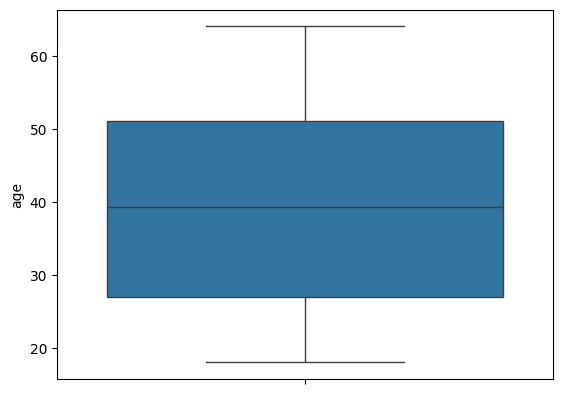

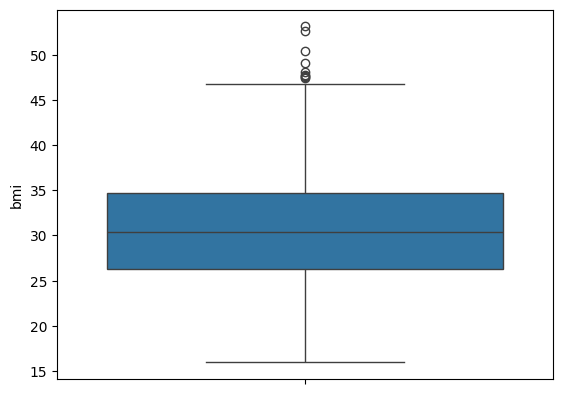

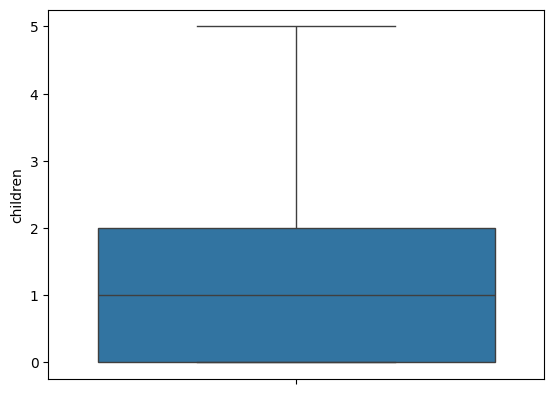

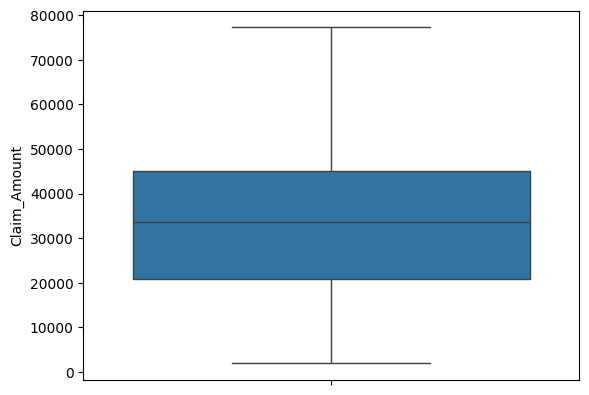

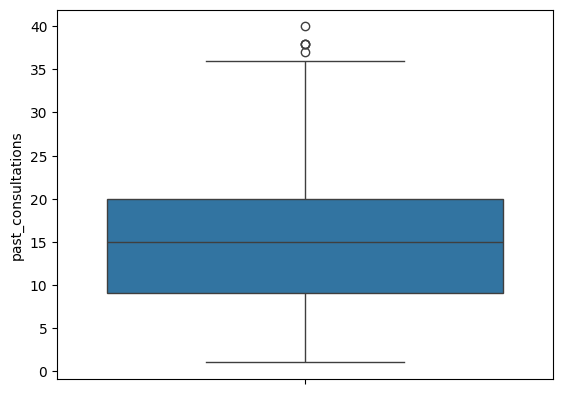

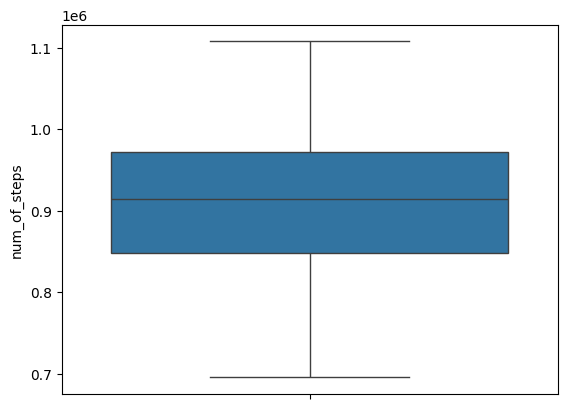

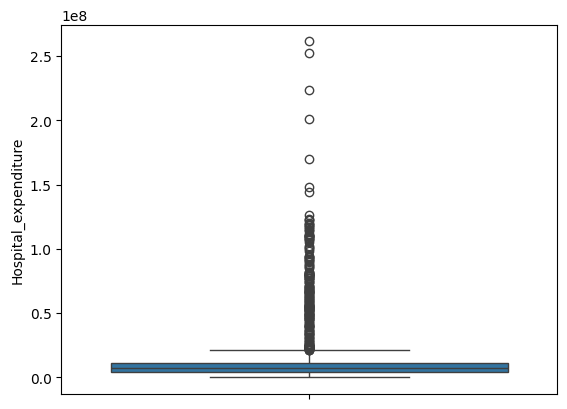

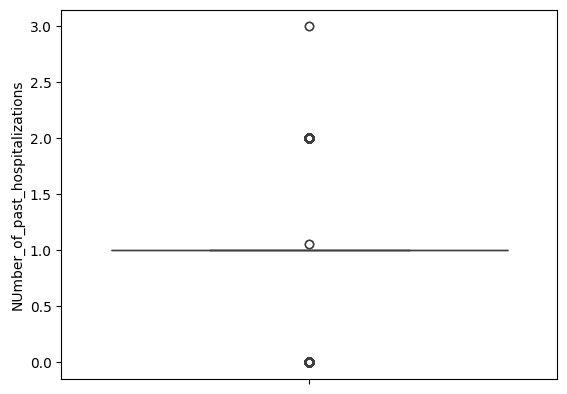

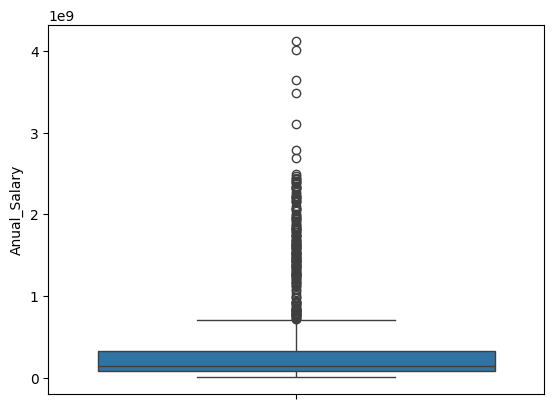

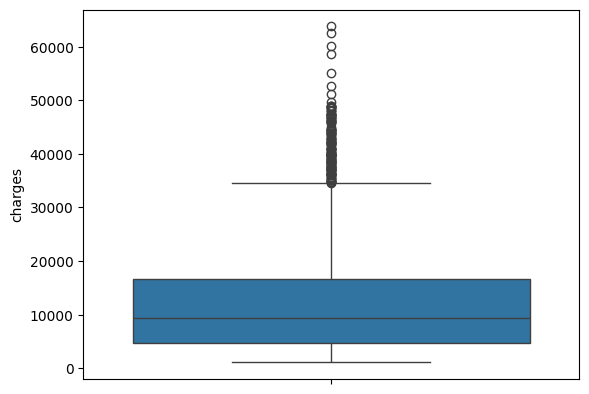

In [25]:
# identifying outliers using boxplot for each numerical columns

for cname in cols:
  if df[cname].dtype != 'object':
    sns.boxplot(df[cname])
    plt.show()



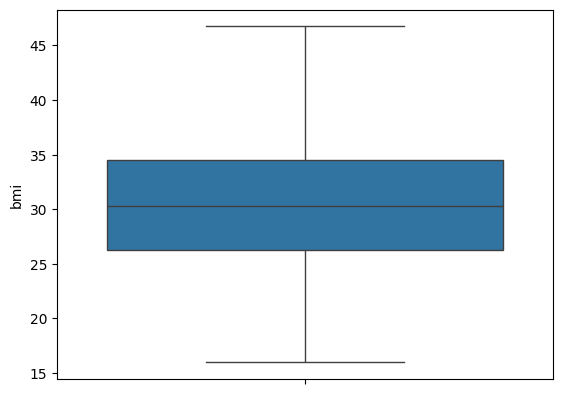

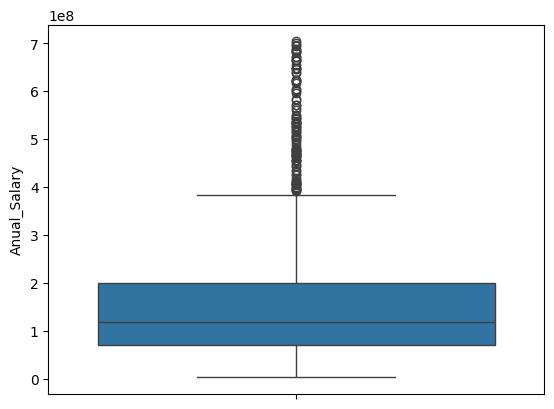

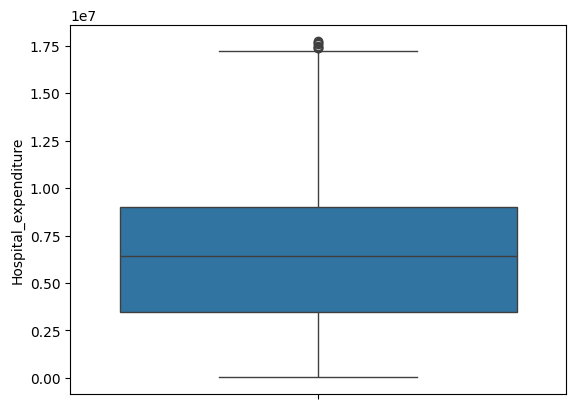

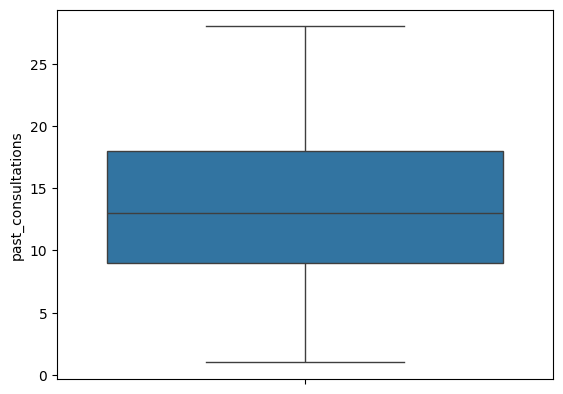

In [26]:
# Removing Outliers

column_list = ['bmi','Anual_Salary','Hospital_expenditure','past_consultations']

for cname in column_list:
  Q1 = df[cname].quantile(0.25)
  Q3 = df[cname].quantile(0.75)

  IQR = Q3-Q1

  LB = Q1 - 1.5*IQR
  UB = Q3 + 1.5*IQR

  df = df[(df[cname] >= LB) & (df[cname] <= UB)]

  sns.boxplot(df[cname])
  plt.show()

In [27]:
# checking the shape after removing outliers

df.shape

(1110, 13)

**Data Visualization**

In [28]:
#identifying correlation between columns

df.corr(numeric_only= True)

,age,bmi,children,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,charges
age,1.000000,0.151044,0.035713,0.109456,0.166354,0.664422,0.137737,0.492206,0.313832,0.518342
bmi,0.151044,1.000000,-0.007979,-0.004711,-0.003455,-0.009644,-0.042477,-0.011056,-0.078884,-0.059214
children,0.035713,-0.007979,1.000000,0.041851,0.041943,0.213024,0.010346,0.291543,0.062406,0.123917
Claim_Amount,0.109456,-0.004711,0.041851,1.000000,0.095784,0.209931,0.105830,0.137239,0.183870,0.215490
past_consultations,0.166354,-0.003455,0.041943,0.095784,1.000000,0.330546,0.209457,0.176547,0.356233,0.364876
num_of_steps,0.664422,-0.009644,0.213024,0.209931,0.330546,1.000000,0.448551,0.707576,0.764947,0.925693
Hospital_expenditure,0.137737,-0.042477,0.010346,0.105830,0.209457,0.448551,1.000000,0.242375,0.601016,0.564449
NUmber_of_past_hospitalizations,0.492206,-0.011056,0.291543,0.137239,0.176547,0.707576,0.242375,1.000000,0.419688,0.550466
Anual_Salary,0.313832,-0.078884,0.062406,0.183870,0.356233,0.764947,0.601016,0.419688,1.000000,0.924006
charges,0.518342,-0.059214,0.123917,0.215490,0.364876,0.925693,0.564449,0.550466,0.924006,1.000000


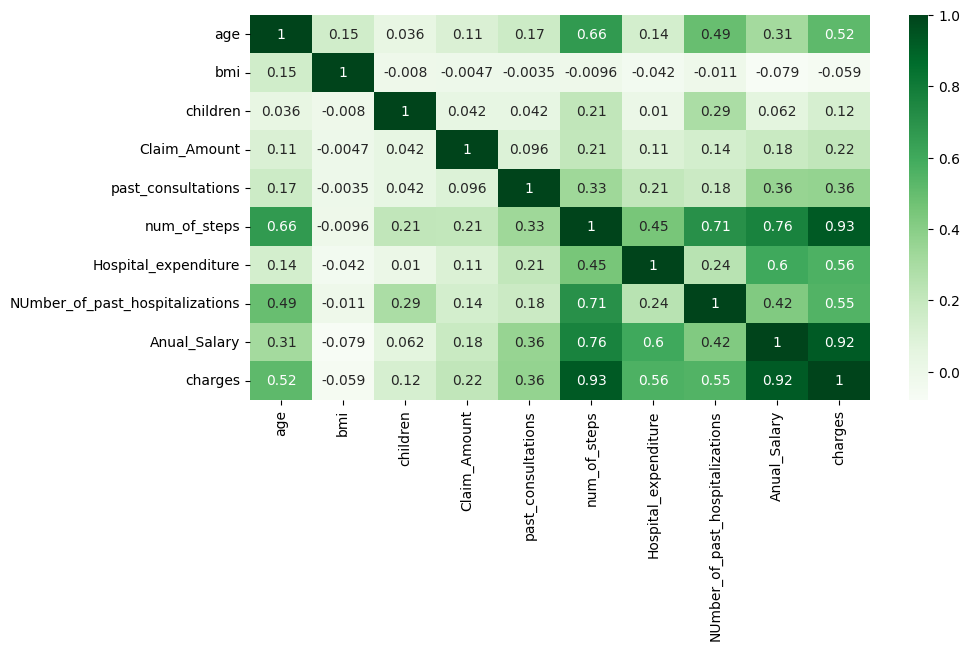

In [29]:
# visualizing correlation between columns using heatmap

plt.figure(figsize=(10,5))
sns.heatmap(data=df.corr(numeric_only = True), annot = True, cmap='Greens')
plt.show()

**Observation**
* We can see that there is a strong positive correlation between num_of_steps and charges column and Anual_Salary and charges column.
* Past consultations are loosely linked to salary and cost
* bmi has very low or negative correlation with all features, including charges
* Claim_Amount correlation with charges is just 0.22


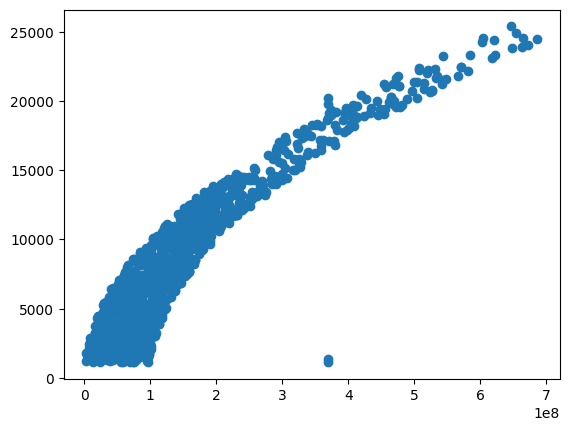

In [30]:
#checking the relationship between Salary and Charges
plt.scatter(df.Anual_Salary, df.charges)
plt.show()


**Encoding**

In [31]:
# Using label Encoding for columns : age, sex, region
## importing library for label encoding

from sklearn.preprocessing import LabelEncoder

In [32]:
le = LabelEncoder()

In [33]:
catergorical_cals = df.select_dtypes(include = 'object').columns
catergorical_cals

Index(['sex', 'smoker', 'region'], dtype='object')

In [34]:
for cols in catergorical_cals:
  df[cols] = le.fit_transform(df[cols])

In [35]:
df.head()

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
0,18.0,1,23.21,0.0,0,29087.54313,17.0,715428.0,4720920.992,0.0,55784970.05,2,1121.8739
1,18.0,1,30.14,0.0,0,39053.67437,7.0,699157.0,4329831.676,0.0,13700885.19,2,1131.5066
2,18.0,1,33.33,0.0,0,39023.62759,19.0,702341.0,6884860.774,0.0,73523107.27,2,1135.9407
3,18.0,1,33.66,0.0,0,28185.39332,11.0,700250.0,4274773.550,0.0,75819679.60,2,1136.3994
4,18.0,1,34.10,0.0,0,14697.85941,16.0,711584.0,3787293.921,0.0,23012320.01,2,1137.0110


**Data Splitting**
* Splitting the data into training and test dataset

In [36]:
#split data into training and test set

from sklearn.model_selection import train_test_split

X = df.drop('charges', axis=1)
y = df['charges']

X_train, X_test, y_train, y_test = train_test_split(X,y,train_size = 0.8, random_state = 42)

**Model Building**

In [37]:
# train the model using linear regression

from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [38]:
y_pred = model.predict(X_test)

**Model Evaluation**
* We will use r^2 square score to evaluate our model

In [39]:
# check r^2 square score

from sklearn.metrics import r2_score

rSq_score = r2_score(y_test, y_pred)
print(f'R2 Score of the model is : {rSq_score}')

R2 Score of the model is : 0.9752452546222867


**Model Visualisation**

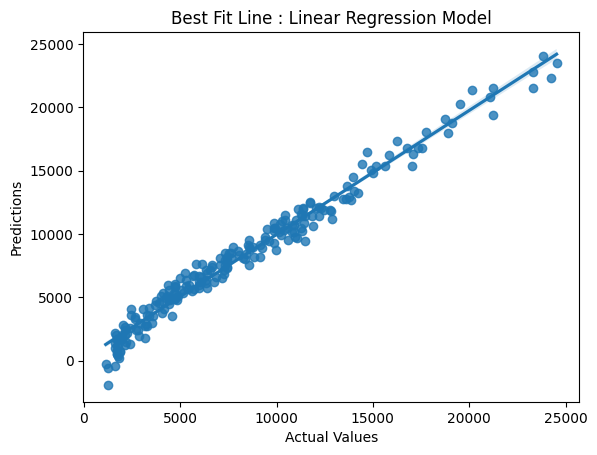

In [40]:
sns.regplot(x = y_test, y=y_pred)
plt.title('Best Fit Line : Linear Regression Model')
plt.xlabel('Actual Values')
plt.ylabel('Predictions')
plt.show()

In [41]:
print(f'Coefficient: {model.coef_}')
print(f'Intercept: {model.intercept_}')

Coefficient: [ 1.42578992e+01 -5.63441667e+01 -6.55288847e+00 -4.85245958e+00
  1.07803902e+03  2.89986131e-03 -6.19631468e-01  4.28167786e-02
  2.54651792e-05 -1.13246323e+03  1.98891310e-05 -1.28022189e+01]
Intercept: -31880.57745501498
